In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data_Train (2).csv")
dataset_train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [4]:
dataset_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data_Test (2).csv")
dataset_test.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0


In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
dataset_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Tata Bolt Revotron XT                   1
Mercedes-Benz E-Class 230               1
Maruti Dzire ZDI                        1
Renault Duster 85PS Diesel RxL Plus     1
Tata Tigor XE Diesel                    1
Name: Name, Length: 1876, dtype: int64

In [7]:
make_train = dataset_train["Name"].str.split(" ", expand = True)
make_test = dataset_test["Name"].str.split(" ", expand = True)

In [8]:
dataset_train["Manufacturer"] = make_train[0]
dataset_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

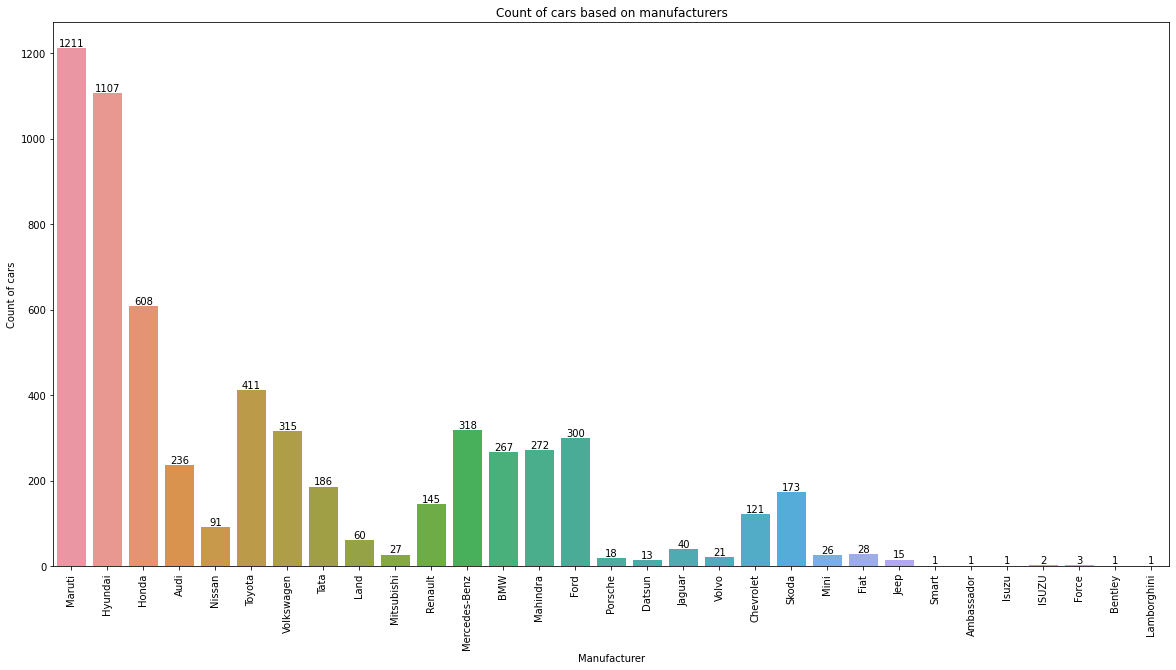

In [9]:
plt.figure(figsize = (20, 10))
plot = sns.countplot(x = 'Manufacturer', data = dataset_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [10]:
dataset_train.drop("Name", axis = 1, inplace = True)
dataset_test.drop("Name", axis = 1, inplace = True)

In [11]:
dataset_train.drop("Location", axis = 1, inplace = True)
dataset_test.drop("Location", axis = 1, inplace = True)

In [12]:
curr_time = datetime.datetime.now()
dataset_train['Year'] = dataset_train['Year'].apply(lambda x : curr_time.year - x)
dataset_test['Year'] = dataset_test['Year'].apply(lambda x : curr_time.year - x)

In [13]:
dataset_train["Kilometers_Driven"]

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 6019, dtype: int64

In [14]:
mileage_train = dataset_train["Mileage"].str.split(" ", expand = True)
mileage_test = dataset_test["Mileage"].str.split(" ", expand = True)

dataset_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
dataset_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [15]:
print(sum(dataset_train["Mileage"].isnull()))
print(sum(dataset_test["Mileage"].isnull()))

2
0


In [16]:
dataset_train["Mileage"].fillna(dataset_train["Mileage"].astype("float64").mean(), inplace = True)
dataset_test["Mileage"].fillna(dataset_train["Mileage"].astype("float64").mean(), inplace = True)

In [17]:
cc_train = dataset_train["Engine"].str.split(" ", expand = True)
cc_test = dataset_test["Engine"].str.split(" ", expand = True)
dataset_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
dataset_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = dataset_train["Power"].str.split(" ", expand = True)
bhp_test = dataset_test["Power"].str.split(" ", expand = True)
dataset_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
dataset_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [18]:
dataset_train["Engine"].fillna(dataset_train["Engine"].astype("float64").mean(), inplace = True)
dataset_test["Engine"].fillna(dataset_train["Engine"].astype("float64").mean(), inplace = True)

dataset_train["Power"].fillna(dataset_train["Power"].astype("float64").mean(), inplace = True)
dataset_test["Power"].fillna(dataset_train["Power"].astype("float64").mean(), inplace = True)

dataset_train["Seats"].fillna(dataset_train["Seats"].astype("float64").mean(), inplace = True)
dataset_test["Seats"].fillna(dataset_train["Seats"].astype("float64").mean(), inplace = True)

In [19]:
dataset_train

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
0,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...
6014,6,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,5,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,8,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,7,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


In [20]:
dataset_test

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Manufacturer
0,6,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,Maruti
1,7,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,Maruti
2,3,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,Toyota
3,8,139000,Diesel,Manual,First,23.59,1364.0,113.25305,5.0,Toyota
4,6,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...
1229,9,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0,Volkswagen
1230,5,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0,Volkswagen
1231,8,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0,Nissan
1232,7,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0,Volkswagen


In [21]:
dataset_train = pd.get_dummies(dataset_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [22]:
dataset_test = pd.get_dummies(dataset_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [23]:
dataset_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_ISUZU,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lamborghini,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-Benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,10,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,9,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,8,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,7,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,5,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6016,8,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
6017,7,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [24]:
dataset_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Ford,Manufacturer_Hindustan,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_ISUZU,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-Benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,6,40929,32.26,998.0,58.20000,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7,54493,24.70,796.0,47.30000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,3,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,8,139000,23.59,1364.0,113.25305,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,6,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,9,89411,20.54,1598.0,103.60000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
1230,5,59000,17.21,1197.0,103.60000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,8,28000,23.08,1461.0,63.10000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1232,7,52262,17.20,1197.0,103.60000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [25]:
missing_cols = set(dataset_train.columns) - set(dataset_test.columns)
for col in missing_cols:
    dataset_test[col] = 0
dataset_test = dataset_test[dataset_train.columns]

In [26]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6019 non-null   int64  
 1   Kilometers_Driven           6019 non-null   int64  
 2   Mileage                     6019 non-null   float64
 3   Engine                      6019 non-null   float64
 4   Power                       6019 non-null   float64
 5   Seats                       6019 non-null   float64
 6   Price                       6019 non-null   float64
 7   Manufacturer_Audi           6019 non-null   uint8  
 8   Manufacturer_BMW            6019 non-null   uint8  
 9   Manufacturer_Bentley        6019 non-null   uint8  
 10  Manufacturer_Chevrolet      6019 non-null   uint8  
 11  Manufacturer_Datsun         6019 non-null   uint8  
 12  Manufacturer_Fiat           6019 non-null   uint8  
 13  Manufacturer_Force          6019 

In [27]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1234 non-null   int64  
 1   Kilometers_Driven           1234 non-null   int64  
 2   Mileage                     1234 non-null   float64
 3   Engine                      1234 non-null   float64
 4   Power                       1234 non-null   float64
 5   Seats                       1234 non-null   float64
 6   Price                       1234 non-null   int64  
 7   Manufacturer_Audi           1234 non-null   int64  
 8   Manufacturer_BMW            1234 non-null   uint8  
 9   Manufacturer_Bentley        1234 non-null   uint8  
 10  Manufacturer_Chevrolet      1234 non-null   uint8  
 11  Manufacturer_Datsun         1234 non-null   uint8  
 12  Manufacturer_Fiat           1234 non-null   uint8  
 13  Manufacturer_Force          1234 

In [28]:
dataset_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_ISUZU,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lamborghini,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-Benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,10,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,9,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,8,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,7,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,5,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6016,8,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
6017,7,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [29]:
dataset_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Force,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_ISUZU,Manufacturer_Isuzu,Manufacturer_Jaguar,Manufacturer_Jeep,Manufacturer_Lamborghini,Manufacturer_Land,Manufacturer_Mahindra,Manufacturer_Maruti,Manufacturer_Mercedes-Benz,Manufacturer_Mini,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Smart,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,6,40929,32.26,998.0,58.20000,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7,54493,24.70,796.0,47.30000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,3,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,8,139000,23.59,1364.0,113.25305,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,6,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,9,89411,20.54,1598.0,103.60000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1230,5,59000,17.21,1197.0,103.60000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1231,8,28000,23.08,1461.0,63.10000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1232,7,52262,17.20,1197.0,103.60000,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [30]:
X_train, X_test1, y_train, y_test1 = train_test_split(dataset_train.iloc[:,:-1], 
                                                    dataset_train.iloc[:, 1], 
                                                    test_size = 0.3, 
                                                    random_state =42)

In [31]:
X_train1, X_test, y_train1, y_test = train_test_split(dataset_test.iloc[:,:-1], 
                                                    dataset_test.iloc[:, 1], 
                                                    test_size = 0.3, 
                                                    random_state =42)

In [32]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [33]:
X_train

array([[ 0.74026657,  0.51111027,  0.85689938, ...,  0.63145735,
        -0.03447046, -0.4356339 ],
       [-0.80427733, -0.98653885,  0.48304626, ...,  0.63145735,
        -0.03447046, -0.4356339 ],
       [-0.18645977,  0.35263818, -0.66693471, ...,  0.63145735,
        -0.03447046, -0.4356339 ],
       ...,
       [ 0.12244901,  2.16486895, -0.66693471, ...,  0.63145735,
        -0.03447046,  2.29550544],
       [-0.18645977,  0.49572769,  1.67238018, ...,  0.63145735,
        -0.03447046, -0.4356339 ],
       [ 0.74026657,  1.06236316, -1.1697781 , ...,  0.63145735,
        -0.03447046,  2.29550544]])

In [34]:
X_test

array([[-0.18645977,  0.40198844, -0.18595408, ...,  0.63145735,
        -0.03447046,  2.29550544],
       [-0.18645977,  0.33859436, -0.25154234, ...,  0.63145735,
        -0.03447046, -0.4356339 ],
       [-0.49536855,  0.09110806, -0.52919935, ..., -1.58363824,
        -0.03447046, -0.4356339 ],
       ...,
       [-0.80427733, -0.27639387,  0.78037974, ..., -1.58363824,
        -0.03447046, -0.4356339 ],
       [-1.11318611, -0.77514649,  1.06022301, ...,  0.63145735,
        -0.03447046, -0.4356339 ],
       [-1.11318611, -1.11639828,  0.15947747, ...,  0.63145735,
        -0.03447046, -0.4356339 ]])

In [35]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)

print("Accuracy :",r2_score(y_test, y_pred))

Accuracy : 0.9999989811123317


In [36]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy :",r2_score(y_test, y_pred))

Accuracy : 0.999936541444292


# Report on the models success and most important Features

Training dataset is used for training the model and Test dataset is used for testing the model. This data frames are filtered out by only considering few columns which would be relevant for prediction. Here the most significant columns or factors are **Year, Kilometers_Driven, Mileage, Engine, Power, Seats,Price, Manufacturer, Fuel_Type, Transmission, Owner_Type**. After this the dataset is cleaned by replacing NANs with appropriate values in numerical as well object columns. Test data is also cleaned and irrelevant columns are removed. Linear Regression and  Random forest classifier is used to predict the Used car price for dataset. 
# Accuracy of the model is as follow -

1) Linear Regression - **0.99**

2) Random forest - **0.99**